Brain Stroke Prediction CT Scan
Using Deep Learning (CNN)
Through TensorFlow / Keras

Cleaning The Dataset

In [6]:
import tensorflow as tf
import os
import cv2
import imghdr

DatasetDir = 'Dataset'

ImageExts = ['jpeg', 'jpg', 'bmp', 'png']

for ImageClass in os.listdir(DatasetDir): 
    for Image in os.listdir(os.path.join(DatasetDir, ImageClass)):
        ImagePath = os.path.join(DatasetDir, ImageClass, Image)
        try: 
            Img = cv2.imread(ImagePath)
            ImgExt = imghdr.what(ImagePath)
            if ImgExt not in ImageExts:
                print(f'This image is going to be deleted because it\'s extension is not compatible : {ImagePath}')
                os.remove(ImagePath)
        except Exception as e:
            print(f'Issue with image {ImagePath}')

Issue with image Dataset\Test\Normal
Issue with image Dataset\Test\Stroke
Issue with image Dataset\Train\Normal
Issue with image Dataset\Train\Stroke
Issue with image Dataset\Validation\Normal
Issue with image Dataset\Validation\Stroke


Loading the Dataset

Found 1843 files belonging to 2 classes.
Found 437 files belonging to 2 classes.
Found 235 files belonging to 2 classes.


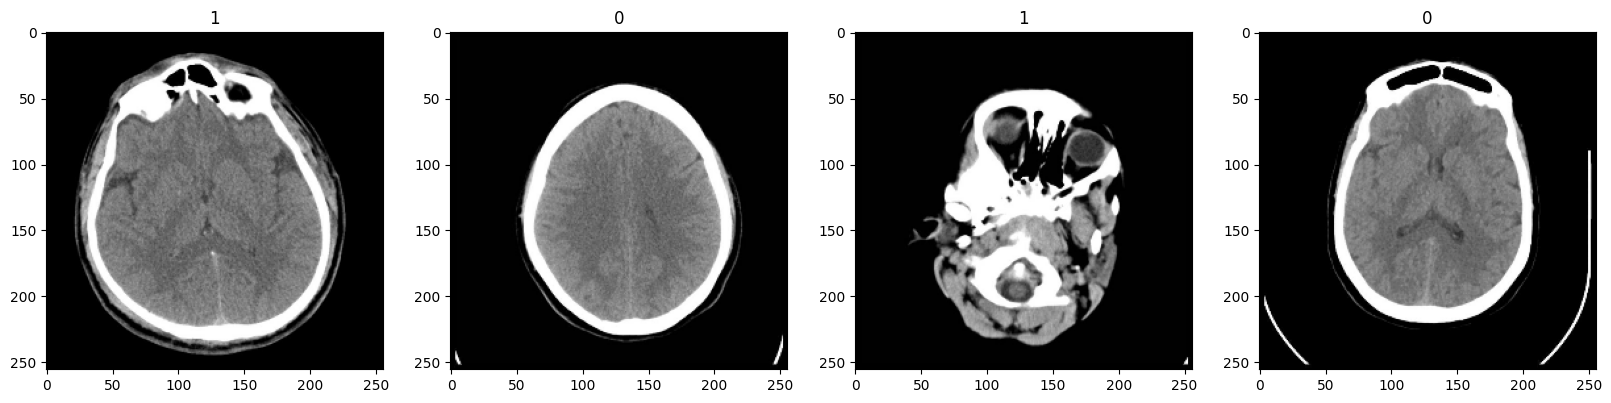

In [7]:
import numpy as np
from matplotlib import pyplot as plt

TrainingData = tf.keras.utils.image_dataset_from_directory('Dataset/Train').map(lambda x,y: (x/255, y))
TestingData = tf.keras.utils.image_dataset_from_directory('Dataset/Test').map(lambda x,y: (x/255, y))
ValidationData = tf.keras.utils.image_dataset_from_directory('Dataset/Validation').map(lambda x,y: (x/255, y))

DataIterator = TrainingData.as_numpy_iterator()

Batch = DataIterator.next()

Fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(Batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(Batch[1][idx])

The Deep Learning Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Model = Sequential()

Model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
Model.add(MaxPooling2D())
Model.add(Conv2D(32, (3,3), 1, activation='relu'))
Model.add(MaxPooling2D())
Model.add(Conv2D(16, (3,3), 1, activation='relu'))
Model.add(MaxPooling2D())
Model.add(Flatten())
Model.add(Dense(256, activation='relu'))
Model.add(Dense(1, activation='sigmoid'))

Model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Model.summary()

c:\Users\asusg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [9]:
LogDir='logs'
Tensorboard_Callback = tf.keras.callbacks.TensorBoard(log_dir=LogDir)
History = Model.fit(TrainingData, epochs=20, validation_data=ValidationData, callbacks=[Tensorboard_Callback])

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.6000 - loss: 0.6910 - val_accuracy: 0.8170 - val_loss: 0.4144
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.8534 - loss: 0.3318 - val_accuracy: 0.9234 - val_loss: 0.1725
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9505 - loss: 0.1265 - val_accuracy: 0.9787 - val_loss: 0.0756
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9767 - loss: 0.0730 - val_accuracy: 0.9617 - val_loss: 0.0949
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9944 - loss: 0.0225 - val_accuracy: 0.9702 - val_loss: 0.0763
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9745 - val_loss: 0.0702
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 0.9617 - val_loss: 0.1464
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9787 - v

Model Performance

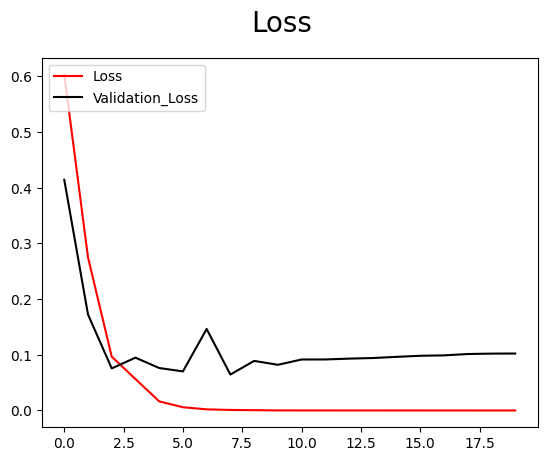

In [10]:
Fig = plt.figure()
plt.plot(History.history['loss'], color='red', label='Loss')
plt.plot(History.history['val_loss'], color='black', label='Validation_Loss')
Fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

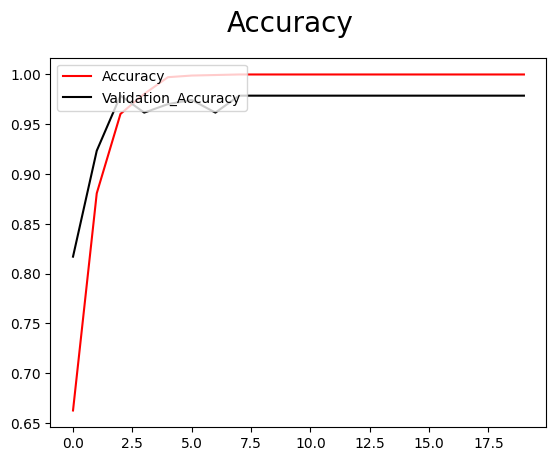

In [11]:
Fig = plt.figure()
plt.plot(History.history['accuracy'], color='red', label='Accuracy')
plt.plot(History.history['val_accuracy'], color='black', label='Validation_Accuracy')
Fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation

In [12]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize metrics
Precision = Precision()
Recall = Recall()
Accuracy = BinaryAccuracy()

# Initialize confusion matrix (assuming binary classification)
cm = np.zeros((2, 2))  # Adjust dimensions for multi-class problems

for Batch in TestingData.as_numpy_iterator():
  X, y = Batch
  yhat = Model.predict(X)

  # Update metrics
  Precision.update_state(y, yhat)
  Recall.update_state(y, yhat)
  Accuracy.update_state(y, yhat)

  # Calculate and accumulate confusion matrix
  cm += confusion_matrix(y, yhat.round())  # Round predictions for binary classes

# After iterating through all batches:

# Get final values for metrics
precision = Precision.result().numpy()
recall = Recall.result().numpy()
accuracy = Accuracy.result().numpy()

# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(cm)

# Assuming you have class labels for your data
class_labels = ["Normal", "Stroke"]  # Adjust labels accordingly

# Get integer values for counts in the confusion matrix
cm_int = cm.astype(int)  # Convert to integer type

# Create a heatmap with integer annotations
sns.heatmap(cm_int, annot=True, fmt="d")  # Use 'd' format for integers
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [13]:
print(f"Precision : {Precision.result()}, Recall : {Recall.result()}, Accuracy : {Accuracy.result()}")

Precision : 0.8928571343421936, Recall : 0.9615384340286255, Accuracy : 0.9542334079742432


Testing the Model

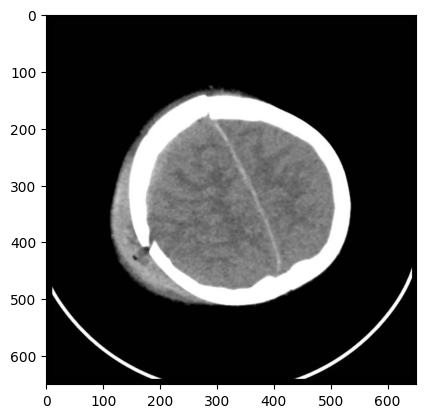

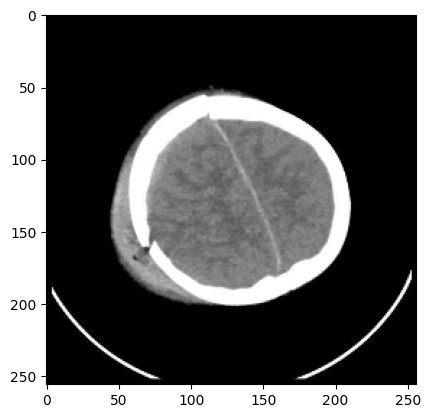

In [14]:
import cv2

Img = cv2.imread('Dataset/Test/Normal/51 (42).jpg')
plt.imshow(Img)
plt.show()

ResizedImg = tf.image.resize(Img, (256,256))
plt.imshow(ResizedImg.numpy().astype(int))
plt.show()

In [15]:
yhat = Model.predict(np.expand_dims(ResizedImg/255, 0))

print(yhat)

if yhat > 0.5: 
    print(f'Predicted class is Stroke')
else:
    print(f'Predicted class is Normal')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[1.655682e-12]]
Predicted class is Normal


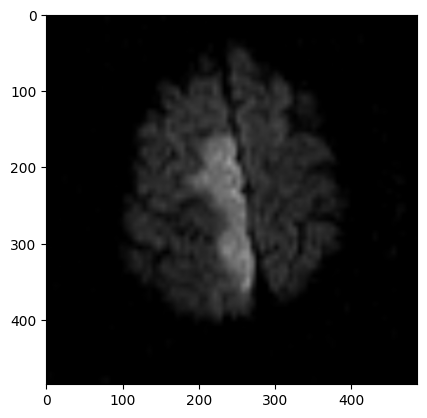

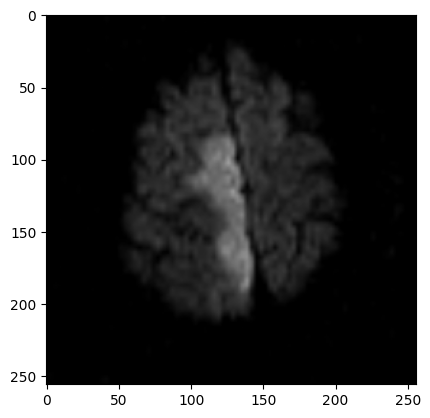

In [19]:
import cv2

Img = cv2.imread('2 (98).png')
plt.imshow(Img)
plt.show()

ResizedImg = tf.image.resize(Img, (256,256))
plt.imshow(ResizedImg.numpy().astype(int))
plt.show()

In [20]:
yhat = Model.predict(np.expand_dims(ResizedImg/255, 0))
print(yhat)
if yhat > 0.5: 
    print(f'Predicted class is Stroke')
else:
    print(f'Predicted class is Normal')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.4215588]]
Predicted class is Normal


Saving the Model

In [18]:
from tensorflow.keras.models import load_model

Model.save(os.path.join('Models','BrainStrokeClassifier.keras'))
